Lane Detection \
Prova sfruttando il colore marrone

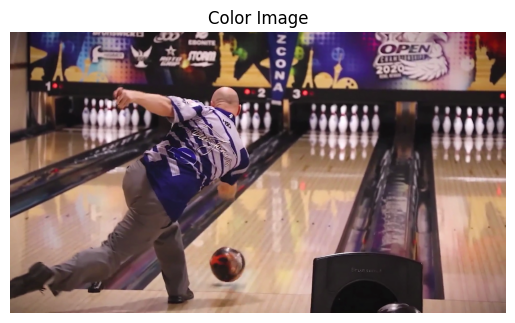

In [1]:
import cv2
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import math

# Load the image
image_path_1 = '/Users/miche/OneDrive/Documenti/GitHub/bowling-analysis/data/recording_1/recording_1_frames/frame00051.png'
# image_path_2 = '/Users/miche/OneDrive/Documenti/GitHub/bowling-analysis/data/recording_2/frames/frame_2 (10).png'
image_path_3 = '/Users/miche/OneDrive/Documenti/GitHub/bowling-analysis/data/recording_3/frames/frame_3 (23).png'

# Load the image in color
image_color = cv2.imread(image_path_3, cv2.IMREAD_COLOR)

# Display the image
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title('Color Image')
plt.axis('off')
plt.show()

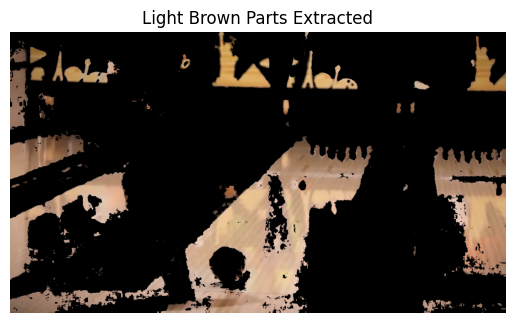

In [4]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Define the range for light brown color in HSV
lower_brown = np.array([10, 50, 50])
upper_brown = np.array([20, 200, 255])

# Create a mask for light brown color
mask = cv2.inRange(hsv_image, lower_brown, upper_brown)

# Apply the mask to the original image
brown_extracted = cv2.bitwise_and(image_color, image_color, mask=mask)

# Display the result
plt.imshow(cv2.cvtColor(brown_extracted, cv2.COLOR_BGR2RGB))
plt.title('Light Brown Parts Extracted')
plt.axis('off')
plt.show()

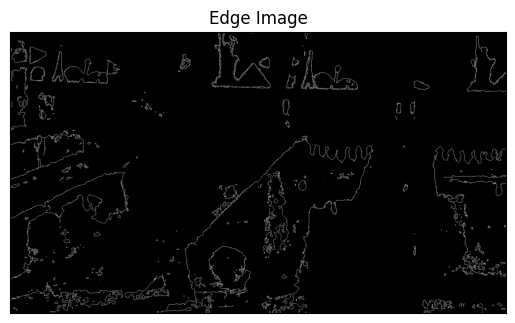

In [10]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(brown_extracted, cv2.COLOR_BGR2GRAY)

# Compute Otsu's threshold 
otsu_thresh, _ = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set lower and upper thresholds relative to Otsu's threshold
lower = 0.5 * otsu_thresh
upper = 1.5 * otsu_thresh

edges = cv2.Canny(gray_image, lower, upper)


# Display the original image and the edge-detected image
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.show()

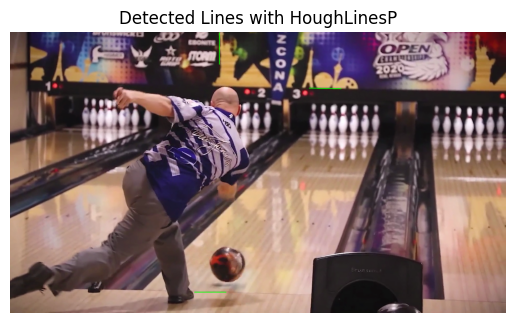

In [28]:
# Apply Probabilistic Hough Line Transform
min_line_length = 100
max_line_gap = 10
lines_p = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=min_line_length, maxLineGap=max_line_gap)

# Create a copy of the original image to draw lines on
line_image_p = np.copy(image_color)

# Draw the lines on the image
if lines_p is not None:
    for line in lines_p:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image_p, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(line_image_p, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines with HoughLinesP')
plt.axis('off')
plt.show()

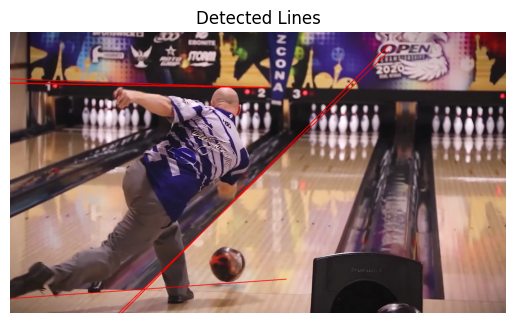

In [29]:
# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# Create a copy of the original image to draw lines on
line_image = np.copy(image_color)

# Draw the lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')
plt.show()